# Vintage Analysis Of Credit Card Dataset

In [1]:
## import necessary libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from lifelines import NelsonAalenFitter, CoxPHFitter, KaplanMeierFitter
from lifelines.statistics import logrank_test

%matplotlib inline
%config InlineBackend.figure_format = 'svg'



In [2]:
!pip install lifelines

In [3]:
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 100)

In [4]:
## load 'application_record' dataset

application = pd.read_csv('application_record.csv')
application.head()

ID CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  \
0  5008804           M            Y               Y             0   
1  5008805           M            Y               Y             0   
2  5008806           M            Y               Y             0   
3  5008808           F            N               Y             0   
4  5008809           F            N               Y             0   

   AMT_INCOME_TOTAL      NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0          427500.0               Working               Higher education   
1          427500.0               Working               Higher education   
2          112500.0               Working  Secondary / secondary special   
3          270000.0  Commercial associate  Secondary / secondary special   
4          270000.0  Commercial associate  Secondary / secondary special   

     NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  DAYS_BIRTH  DAYS_EMPLOYED  \
0        Civil marriage   Rented apartment      -12005          -4542   
1        Civil marriage   Rented apartment      -12005          -4542   
2               Married  House / apartment      -21474          -1134   
3  Single / not married  House / apartment      -19110          -3051   
4  Single / not married  House / apartment      -19110          -3051   

   FLAG_MOBIL  FLAG_WORK_PHONE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  \
0           1                1           0           0             NaN   
1           1                1           0           0             NaN   
2           1                0           0           0  Security staff   
3           1                0           1           1     Sales staff   
4           1                0           1           1     Sales staff   

   CNT_FAM_MEMBERS  
0              2.0  
1              2.0  
2              2.0  
3              1.0  
4              1.0

In [5]:
## load 'credit_record' dataset

credit = pd.read_csv('credit_record.csv')
credit.head()

ID  MONTHS_BALANCE STATUS
0  5001711               0      X
1  5001711              -1      0
2  5001711              -2      0
3  5001711              -3      0
4  5001712               0      C

### Extract Basic information about datasets 

In [6]:
## shape of 'application' dataset
print(application.shape)

(438557, 18)


In [7]:
## datatype and non-null count of application dataset
application.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438557 non-null  int64  
 1   CODE_GENDER          438557 non-null  object 
 2   FLAG_OWN_CAR         438557 non-null  object 
 3   FLAG_OWN_REALTY      438557 non-null  object 
 4   CNT_CHILDREN         438557 non-null  int64  
 5   AMT_INCOME_TOTAL     438557 non-null  float64
 6   NAME_INCOME_TYPE     438557 non-null  object 
 7   NAME_EDUCATION_TYPE  438557 non-null  object 
 8   NAME_FAMILY_STATUS   438557 non-null  object 
 9   NAME_HOUSING_TYPE    438557 non-null  object 
 10  DAYS_BIRTH           438557 non-null  int64  
 11  DAYS_EMPLOYED        438557 non-null  int64  
 12  FLAG_MOBIL           438557 non-null  int64  
 13  FLAG_WORK_PHONE      438557 non-null  int64  
 14  FLAG_PHONE           438557 non-null  int64  
 15  FLAG_EMAIL       

In [8]:
## statistical summary of application dataset

application.describe()

ID   CNT_CHILDREN  AMT_INCOME_TOTAL     DAYS_BIRTH  \
count  4.385570e+05  438557.000000      4.385570e+05  438557.000000   
mean   6.022176e+06       0.427390      1.875243e+05  -15997.904649   
std    5.716370e+05       0.724882      1.100869e+05    4185.030007   
min    5.008804e+06       0.000000      2.610000e+04  -25201.000000   
25%    5.609375e+06       0.000000      1.215000e+05  -19483.000000   
50%    6.047745e+06       0.000000      1.607805e+05  -15630.000000   
75%    6.456971e+06       1.000000      2.250000e+05  -12514.000000   
max    7.999952e+06      19.000000      6.750000e+06   -7489.000000   

       DAYS_EMPLOYED  FLAG_MOBIL  FLAG_WORK_PHONE     FLAG_PHONE  \
count  438557.000000    438557.0    438557.000000  438557.000000   
mean    60563.675328         1.0         0.206133       0.287771   
std    138767.799647         0.0         0.404527       0.452724   
min    -17531.000000         1.0         0.000000       0.000000   
25%     -3103.000000         1.0         0.000000       0.000000   
50%     -1467.000000         1.0         0.000000       0.000000   
75%      -371.000000         1.0         0.000000       1.000000   
max    365243.000000         1.0         1.000000       1.000000   

          FLAG_EMAIL  CNT_FAM_MEMBERS  
count  438557.000000    438557.000000  
mean        0.108207         2.194465  
std         0.310642         0.897207  
min         0.000000         1.000000  
25%         0.000000         2.000000  
50%         0.000000         2.000000  
75%         0.000000         3.000000  
max         1.000000        20.000000

In [9]:
## find number of null values column wise
application.isnull().sum()

ID                          0
CODE_GENDER                 0
FLAG_OWN_CAR                0
FLAG_OWN_REALTY             0
CNT_CHILDREN                0
AMT_INCOME_TOTAL            0
NAME_INCOME_TYPE            0
NAME_EDUCATION_TYPE         0
NAME_FAMILY_STATUS          0
NAME_HOUSING_TYPE           0
DAYS_BIRTH                  0
DAYS_EMPLOYED               0
FLAG_MOBIL                  0
FLAG_WORK_PHONE             0
FLAG_PHONE                  0
FLAG_EMAIL                  0
OCCUPATION_TYPE        134203
CNT_FAM_MEMBERS             0
dtype: int64

In [10]:
## find number of duplicated records in application dataset

application.duplicated().sum()

0

In [11]:
## shape of credit dataset
print(credit.shape)

(1048575, 3)


In [12]:
## datatype and non-null count of credit dataset

credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   ID              1048575 non-null  int64 
 1   MONTHS_BALANCE  1048575 non-null  int64 
 2   STATUS          1048575 non-null  object
dtypes: int64(2), object(1)
memory usage: 24.0+ MB


In [13]:
## statistical summary of credit dataset

credit.describe()

ID  MONTHS_BALANCE
count  1.048575e+06    1.048575e+06
mean   5.068286e+06   -1.913700e+01
std    4.615058e+04    1.402350e+01
min    5.001711e+06   -6.000000e+01
25%    5.023644e+06   -2.900000e+01
50%    5.062104e+06   -1.700000e+01
75%    5.113856e+06   -7.000000e+00
max    5.150487e+06    0.000000e+00

In [14]:
## find number of null values in credit dataset column wise

credit.isnull().sum()

ID                0
MONTHS_BALANCE    0
STATUS            0
dtype: int64

In [15]:
## find number of duplicated records in credit dataset  

credit.duplicated().sum()

0

In [16]:
credit.head(3)

ID  MONTHS_BALANCE STATUS
0  5001711               0      X
1  5001711              -1      0
2  5001711              -2      0

In [17]:
## number of unique values in 'ID' column of credit dataset

credit['ID'].nunique()

45985

In [18]:
## number of unique values in 'ID' column of application dataset

application['ID'].nunique()

438510

In [19]:
## common 'ID' number in both datasets

len(set(application['ID']).intersection(set(credit['ID']))) 

36457

In [20]:
## perform value_counts() operation on 'MONTHS_BALANCE' column of credit dataset

credit['MONTHS_BALANCE'].value_counts().reset_index()

index  MONTHS_BALANCE
0      -1           34436
1      -2           34209
2       0           33856
3      -3           33854
4      -4           33365
5      -5           32881
6      -6           32296
7      -7           31640
8      -8           30884
9      -9           30272
10    -10           29671
11    -11           29060
12    -12           28439
13    -13           27787
14    -14           27117
15    -15           26483
16    -16           25867
17    -17           25198
18    -18           24425
19    -19           23773
20    -20           23163
21    -21           22526
22    -22           21928
23    -23           21296
24    -24           20617
25    -25           19915
26    -26           19251
27    -27           18691
28    -28           18034
29    -29           17408
30    -30           16799
31    -31           16179
32    -32           15589
33    -33           14993
34    -34           14401
35    -35           13798
36    -36           13174
37    -37           12605
38    -38           12023
39    -39           11379
40    -40           10651
41    -41            9998
42    -42            9392
43    -43            8793
44    -44            8229
45    -45            7706
46    -46            7170
47    -47            6662
48    -48            6103
49    -49            5573
50    -50            5064
51    -51            4575
52    -52            4025
53    -53            3498
54    -54            3028
55    -55            2578
56    -56            2109
57    -57            1649
58    -58            1255
59    -59             820
60    -60             415

In [21]:
## number of unique values in 'MONTHS_BALANCE' collumn of credit dataset

credit['MONTHS_BALANCE'].nunique()

61

In [22]:
## perform value_counts() operation on 'MONTHS_BALANCE' column of credit dataset

credit['STATUS'].value_counts().reset_index()

index  STATUS
0     C  442031
1     0  383120
2     X  209230
3     1   11090
4     5    1693
5     2     868
6     3     320
7     4     223

In [23]:
## number of unique values in 'STATUS' collumn of credit dataset

credit['STATUS'].nunique()

8

In [24]:
application.head(2)

ID CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  \
0  5008804           M            Y               Y             0   
1  5008805           M            Y               Y             0   

   AMT_INCOME_TOTAL NAME_INCOME_TYPE NAME_EDUCATION_TYPE NAME_FAMILY_STATUS  \
0          427500.0          Working    Higher education     Civil marriage   
1          427500.0          Working    Higher education     Civil marriage   

  NAME_HOUSING_TYPE  DAYS_BIRTH  DAYS_EMPLOYED  FLAG_MOBIL  FLAG_WORK_PHONE  \
0  Rented apartment      -12005          -4542           1                1   
1  Rented apartment      -12005          -4542           1                1   

   FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  
0           0           0             NaN              2.0  
1           0           0             NaN              2.0

In [25]:
## fill NaN values of 'OCCUPATION_TYPE' column of application dataset

application['OCCUPATION_TYPE'] = application['OCCUPATION_TYPE'].fillna('Unknown')

In [26]:
application.head()

ID CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  \
0  5008804           M            Y               Y             0   
1  5008805           M            Y               Y             0   
2  5008806           M            Y               Y             0   
3  5008808           F            N               Y             0   
4  5008809           F            N               Y             0   

   AMT_INCOME_TOTAL      NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0          427500.0               Working               Higher education   
1          427500.0               Working               Higher education   
2          112500.0               Working  Secondary / secondary special   
3          270000.0  Commercial associate  Secondary / secondary special   
4          270000.0  Commercial associate  Secondary / secondary special   

     NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  DAYS_BIRTH  DAYS_EMPLOYED  \
0        Civil marriage   Rented apartment      -12005          -4542   
1        Civil marriage   Rented apartment      -12005          -4542   
2               Married  House / apartment      -21474          -1134   
3  Single / not married  House / apartment      -19110          -3051   
4  Single / not married  House / apartment      -19110          -3051   

   FLAG_MOBIL  FLAG_WORK_PHONE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  \
0           1                1           0           0         Unknown   
1           1                1           0           0         Unknown   
2           1                0           0           0  Security staff   
3           1                0           1           1     Sales staff   
4           1                0           1           1     Sales staff   

   CNT_FAM_MEMBERS  
0              2.0  
1              2.0  
2              2.0  
3              1.0  
4              1.0

In [27]:
application.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438557 non-null  int64  
 1   CODE_GENDER          438557 non-null  object 
 2   FLAG_OWN_CAR         438557 non-null  object 
 3   FLAG_OWN_REALTY      438557 non-null  object 
 4   CNT_CHILDREN         438557 non-null  int64  
 5   AMT_INCOME_TOTAL     438557 non-null  float64
 6   NAME_INCOME_TYPE     438557 non-null  object 
 7   NAME_EDUCATION_TYPE  438557 non-null  object 
 8   NAME_FAMILY_STATUS   438557 non-null  object 
 9   NAME_HOUSING_TYPE    438557 non-null  object 
 10  DAYS_BIRTH           438557 non-null  int64  
 11  DAYS_EMPLOYED        438557 non-null  int64  
 12  FLAG_MOBIL           438557 non-null  int64  
 13  FLAG_WORK_PHONE      438557 non-null  int64  
 14  FLAG_PHONE           438557 non-null  int64  
 15  FLAG_EMAIL       

In [28]:
grouped = credit.groupby('ID')
### convert credit data to wide format which every ID is a row
pivot_tb = credit.pivot(index = 'ID', columns = 'MONTHS_BALANCE', values = 'STATUS')
pivot_tb['open_month'] = grouped['MONTHS_BALANCE'].min() # smallest value of MONTHS_BALANCE, is the month when loan was granted
pivot_tb['end_month'] = grouped['MONTHS_BALANCE'].max() # biggest value of MONTHS_BALANCE, might be observe over or canceling account
pivot_tb['ID'] = pivot_tb.index
pivot_tb = pivot_tb[['ID', 'open_month', 'end_month']]
pivot_tb['window'] = pivot_tb['end_month'] - pivot_tb['open_month'] # calculate observe window
pivot_tb.reset_index(drop = True, inplace = True)
credit = pd.merge(credit, pivot_tb, on = 'ID', how = 'left') # join calculated information
credit0 = credit.copy()

In [29]:
credit = credit[credit['window'] > 20] # delete users whose observe window less than 20
credit['status'] = np.where((credit['STATUS'] == '2') | (credit['STATUS'] == '3' )| (credit['STATUS'] == '4' )| (credit['STATUS'] == '5'), 1, 0) # analyze > 60 days past due 
credit['status'] = credit['status'].astype(np.int8) # 1: overdue 0: not
credit['month_on_book'] = credit['MONTHS_BALANCE'] - credit['open_month'] # calculate month on book: how many months after opening account
credit.sort_values(by = ['ID','month_on_book'], inplace = True)

In [30]:
##### denominator
denominator = pivot_tb.groupby(['open_month']).agg({'ID': ['count']}) # count how many users in every month the account was opened
denominator.reset_index(inplace = True)
denominator.columns = ['open_month','sta_sum']

In [31]:
##### ventage table
vintage = credit.groupby(['open_month','month_on_book']).agg({'ID': ['count']}) 
vintage.reset_index(inplace = True)
vintage.columns = ['open_month','month_on_book','sta_sum'] 
vintage['due_count'] = np.nan
vintage = vintage[['open_month','month_on_book','due_count']] # delete aggerate column
vintage = pd.merge(vintage, denominator, on = ['open_month'], how = 'left') # join sta_sum colun to vintage table
vintage

open_month  month_on_book  due_count  sta_sum
0            -60              0        NaN      415
1            -60              1        NaN      415
2            -60              2        NaN      415
3            -60              3        NaN      415
4            -60              4        NaN      415
...          ...            ...        ...      ...
1655         -21             17        NaN      858
1656         -21             18        NaN      858
1657         -21             19        NaN      858
1658         -21             20        NaN      858
1659         -21             21        NaN      858

[1660 rows x 4 columns]

In [32]:
for j in range(-60,1): # outer loop: month in which account was opened
    ls = []
    for i in range(0,61): # inner loop time after the credit card was granted
        due = list(credit[(credit['status'] == 1) & (credit['month_on_book'] == i) & (credit['open_month'] == j)]['ID']) # get ID which satisfy the condition
        ls.extend(due) # As time goes, add bad customers
        vintage.loc[(vintage['month_on_book'] == i) & (vintage['open_month'] == j), 'due_count'] = len(set(ls)) # calculate non-duplicate ID numbers using set()
        
vintage['sta_rate']  = vintage['due_count'] / vintage['sta_sum'] # calculate cumulative % of bad customers
vintage 

open_month  month_on_book  due_count  sta_sum  sta_rate
0            -60              0        0.0      415  0.000000
1            -60              1        0.0      415  0.000000
2            -60              2        0.0      415  0.000000
3            -60              3        0.0      415  0.000000
4            -60              4        0.0      415  0.000000
...          ...            ...        ...      ...       ...
1655         -21             17       15.0      858  0.017483
1656         -21             18       15.0      858  0.017483
1657         -21             19       15.0      858  0.017483
1658         -21             20       15.0      858  0.017483
1659         -21             21       15.0      858  0.017483

[1660 rows x 5 columns]

In [34]:
### Vintage wide table
vintage_wide = vintage.pivot(index = 'open_month',
                             columns = 'month_on_book',
                             values = 'sta_rate')
vintage_wide

month_on_book       0         1         2         3         4         5   \
open_month                                                                 
-60            0.00000  0.000000  0.000000  0.000000  0.000000  0.002410   
-59            0.00000  0.000000  0.000000  0.004926  0.004926  0.004926   
-58            0.00000  0.000000  0.000000  0.000000  0.000000  0.000000   
-57            0.00000  0.000000  0.000000  0.000000  0.002500  0.002500   
-56            0.00000  0.000000  0.004255  0.004255  0.008511  0.010638   
-55            0.00000  0.000000  0.002058  0.006173  0.012346  0.016461   
-54            0.00000  0.000000  0.000000  0.002137  0.004274  0.004274   
-53            0.00000  0.002028  0.002028  0.002028  0.004057  0.004057   
-52            0.00000  0.000000  0.007233  0.009042  0.009042  0.009042   
-51            0.00000  0.001718  0.001718  0.003436  0.003436  0.008591   
-50            0.00000  0.000000  0.001842  0.003683  0.007366  0.007366   
-49            0.00000  0.000000  0.000000  0.000000  0.005425  0.005425   
-48            0.00000  0.000000  0.000000  0.001721  0.005164  0.006885   
-47            0.00000  0.000000  0.000000  0.003273  0.004910  0.004910   
-46            0.00000  0.000000  0.000000  0.001739  0.003478  0.005217   
-45            0.00000  0.000000  0.000000  0.001653  0.004959  0.006612   
-44            0.00000  0.001692  0.003384  0.005076  0.005076  0.006768   
-43            0.00000  0.000000  0.000000  0.000000  0.000000  0.000000   
-42            0.00000  0.000000  0.001425  0.004274  0.007123  0.007123   
-41            0.00000  0.000000  0.000000  0.001435  0.008608  0.008608   
-40            0.00000  0.000000  0.002714  0.002714  0.006784  0.008141   
-39            0.00000  0.001203  0.001203  0.001203  0.001203  0.003610   
-38            0.00134  0.001340  0.001340  0.001340  0.002681  0.002681   
-37            0.00000  0.000000  0.000000  0.000000  0.001389  0.001389   
-36            0.00000  0.000000  0.000000  0.001443  0.002886  0.005772   
-35            0.00000  0.000000  0.000000  0.001312  0.001312  0.001312   
-34            0.00000  0.000000  0.000000  0.000000  0.000000  0.001344   
-33            0.00000  0.000000  0.001377  0.001377  0.001377  0.001377   
-32            0.00000  0.000000  0.001344  0.001344  0.002688  0.002688   
-31            0.00000  0.000000  0.000000  0.000000  0.000000  0.002674   
-30            0.00000  0.000000  0.000000  0.001244  0.001244  0.002488   
-29            0.00000  0.000000  0.000000  0.001282  0.002564  0.005128   
-28            0.00000  0.000000  0.001241  0.001241  0.001241  0.002481   
-27            0.00000  0.000000  0.000000  0.001196  0.002392  0.003589   
-26            0.00000  0.000000  0.000000  0.002660  0.003989  0.005319   
-25            0.00000  0.000000  0.001159  0.002317  0.004635  0.006952   
-24            0.00000  0.000000  0.000000  0.000000  0.000000  0.001119   
-23            0.00000  0.000000  0.000000  0.002225  0.004449  0.005562   
-22            0.00000  0.000000  0.001156  0.002312  0.002312  0.003468   
-21            0.00000  0.000000  0.000000  0.003497  0.004662  0.004662   

month_on_book        6         7         8         9         10        11  \
open_month                                                                  
-60            0.002410  0.007229  0.007229  0.009639  0.009639  0.012048   
-59            0.007389  0.007389  0.007389  0.012315  0.012315  0.019704   
-58            0.000000  0.004545  0.006818  0.006818  0.011364  0.013636   
-57            0.002500  0.007500  0.007500  0.007500  0.007500  0.007500   
-56            0.010638  0.017021  0.017021  0.021277  0.021277  0.025532   
-55            0.022634  0.022634  0.022634  0.024691  0.024691  0.024691   
-54            0.006410  0.012821  0.012821  0.017094  0.019231  0.019231   
-53            0.008114  0.010142  0.010142  0.012170  0.014199  0.014199   
-52            0.012658  0.012658  0.

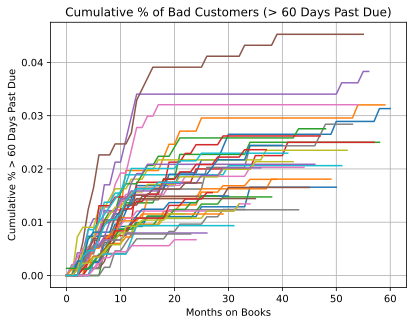

In [35]:
# plot vintage line chart
plt.rcParams['figure.facecolor'] = 'white'
vintage0 = vintage_wide.replace(0,np.nan)
lst = [i for i in range(0,61)]
vintage_wide[lst].T.plot(legend = False, grid = True, title = 'Cumulative % of Bad Customers (> 60 Days Past Due)')
#plt.axvline(30)
#plt.axvline(25)
#plt.axvline(20)
plt.xlabel('Months on Books')
plt.ylabel('Cumulative % > 60 Days Past Due')
plt.show()

## Observe Window Analysis

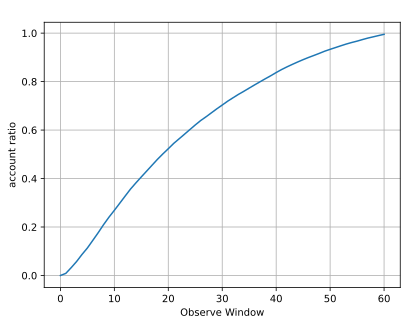

In [36]:
lst = []
for i in range(0,61):
    ratio = len(pivot_tb[pivot_tb['window'] < i]) / len(set(pivot_tb['ID']))
    lst.append(ratio)
    
pd.Series(lst).plot(legend = False, grid = True, title = ' ')
plt.xlabel('Observe Window')
plt.ylabel('account ratio')
plt.show()

In [37]:
def calculate_observe(credit, command):
    '''calculate observe window
    '''
    id_sum = len(set(pivot_tb['ID']))
    credit['status'] = 0
    exec(command)
    #credit.loc[(credit['STATUS'] == '4' )| (credit['STATUS'] == '5'), 'status'] = 1
    credit['month_on_book'] = credit['MONTHS_BALANCE'] - credit['open_month']
    minagg = credit[credit['status'] == 1].groupby('ID')['month_on_book'].min()
    minagg = pd.DataFrame(minagg)
    minagg['ID'] = minagg.index
    obslst = pd.DataFrame({'month_on_book':range(0,61), 'rate': None})
    lst = []
    for i in range(0,61):
        due = list(minagg[minagg['month_on_book']  == i]['ID'])
        lst.extend(due)
        obslst.loc[obslst['month_on_book'] == i, 'rate'] = len(set(lst)) / id_sum 
    return obslst['rate']

command = "credit.loc[(credit['STATUS'] == '0') | (credit['STATUS'] == '1') | (credit['STATUS'] == '2') | (credit['STATUS'] == '3' )| (credit['STATUS'] == '4' )| (credit['STATUS'] == '5'), 'status'] = 1"   
morethan1 = calculate_observe(credit, command)
command = "credit.loc[(credit['STATUS'] == '1') | (credit['STATUS'] == '2') | (credit['STATUS'] == '3' )| (credit['STATUS'] == '4' )| (credit['STATUS'] == '5'), 'status'] = 1"   
morethan30 = calculate_observe(credit, command)
command = "credit.loc[(credit['STATUS'] == '2') | (credit['STATUS'] == '3' )| (credit['STATUS'] == '4' )| (credit['STATUS'] == '5'), 'status'] = 1"
morethan60 = calculate_observe(credit, command)
command = "credit.loc[(credit['STATUS'] == '3' )| (credit['STATUS'] == '4' )| (credit['STATUS'] == '5'), 'status'] = 1"
morethan90 = calculate_observe(credit, command)
command = "credit.loc[(credit['STATUS'] == '4' )| (credit['STATUS'] == '5'), 'status'] = 1"
morethan120 = calculate_observe(credit, command)
command = "credit.loc[(credit['STATUS'] == '5'), 'status'] = 1"
morethan150 = calculate_observe(credit, command)

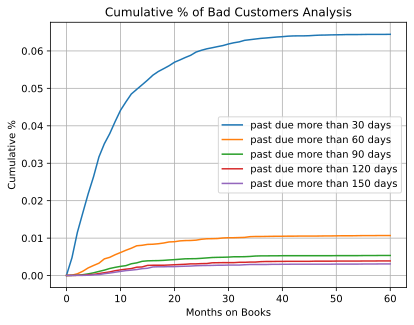

In [38]:
obslst = pd.DataFrame({'past due more than 30 days': morethan30,
                       'past due more than 60 days': morethan60,
                       'past due more than 90 days': morethan90,
                       'past due more than 120 days': morethan120,
                       'past due more than 150 days': morethan150
                        })

obslst.plot(grid = True, title = 'Cumulative % of Bad Customers Analysis')
plt.xlabel('Months on Books')
plt.ylabel('Cumulative %')
plt.show()

## Overall Past-due Ratio

In [39]:
def calculate_rate(pivot_tb, command): 
    '''calculate bad customer rate
    '''
    credit0['status'] = None
    exec(command) # excuate input code
    sumagg = credit0.groupby('ID')['status'].agg(sum)
    pivot_tb = pd.merge(pivot_tb, sumagg, on = 'ID', how = 'left')
    pivot_tb.loc[pivot_tb['status'] > 1, 'status'] = 1
    rate = pivot_tb['status'].sum() / len(pivot_tb)
    return round(rate, 5)

command = "credit0.loc[(credit0['STATUS'] == '0') | (credit0['STATUS'] == '1') | (credit0['STATUS'] == '2') | (credit0['STATUS'] == '3' )| (credit0['STATUS'] == '4' )| (credit0['STATUS'] == '5'), 'status'] = 1"   
morethan1 = calculate_rate(pivot_tb, command)
command = "credit0.loc[(credit0['STATUS'] == '1') | (credit0['STATUS'] == '2') | (credit0['STATUS'] == '3' )| (credit0['STATUS'] == '4' )| (credit0['STATUS'] == '5'), 'status'] = 1"   
morethan30 = calculate_rate(pivot_tb, command)
command = "credit0.loc[(credit0['STATUS'] == '2') | (credit0['STATUS'] == '3' )| (credit0['STATUS'] == '4' )| (credit0['STATUS'] == '5'), 'status'] = 1"
morethan60 = calculate_rate(pivot_tb, command)
command = "credit0.loc[(credit0['STATUS'] == '3' )| (credit0['STATUS'] == '4' )| (credit0['STATUS'] == '5'), 'status'] = 1"
morethan90 = calculate_rate(pivot_tb, command)
command = "credit0.loc[(credit0['STATUS'] == '4' )| (credit0['STATUS'] == '5'), 'status'] = 1"
morethan120 = calculate_rate(pivot_tb, command)
command = "credit0.loc[(credit0['STATUS'] == '5'), 'status'] = 1"
morethan150 = calculate_rate(pivot_tb, command)

summary_dt = pd.DataFrame({'situation':['past due more than 1 day',
                               'past due more than 30 days',
                               'past due more than 60 days',
                               'past due more than 90 days',
                               'past due more than 120 days',
                               'past due more than 150 days'],
                      'bad customer ratio':[morethan1,
                               morethan30,
                               morethan60,
                               morethan90, 
                               morethan120,
                               morethan150, 
                      ]})
summary_dt

situation  bad customer ratio
0     past due more than 1 day             0.87054
1   past due more than 30 days             0.11634
2   past due more than 60 days             0.01450
3   past due more than 90 days             0.00720
4  past due more than 120 days             0.00528
5  past due more than 150 days             0.00424

## Summary

## Survival Analysis

        ID  month_on_book  truncate
0  5001713             21         0
1  5001715             59         0
2  5001717             21         0
3  5001718             38         0
4  5001719             42         0


<AxesSubplot:xlabel='timeline'>

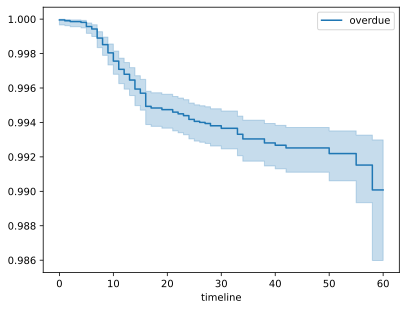

In [40]:
credit['truncate'] = credit.groupby('ID')['status'].transform('max')
truncate = credit.loc[credit['truncate']==1,]
not_trunc = credit.loc[credit['truncate']==0,]

dt1 = not_trunc.groupby('ID').agg({'month_on_book': ['max'],
                            'truncate':['max']
                           })
dt1.reset_index(inplace = True)
dt1.columns = ['ID','month_on_book','truncate']
dt2 = truncate.loc[truncate['status']==1,].groupby('ID').agg({'month_on_book': ['min'],
                            'truncate':['max']
                           })
dt2.reset_index(inplace = True)
dt2.columns = ['ID','month_on_book','truncate'] 
dt = dt1.append(dt2)

print(dt.head())

kmf = KaplanMeierFitter()
kmf.fit(dt['month_on_book'], event_observed=dt['truncate'], label='overdue')
kmf.plot()

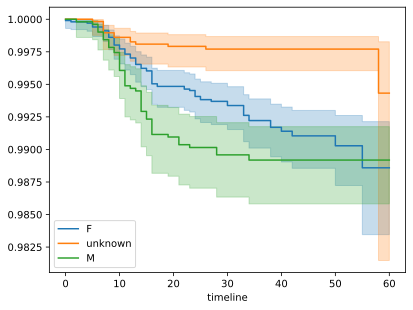

In [41]:
application = application[['ID', 'CODE_GENDER', 'FLAG_OWN_CAR', 'NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE']]
dt = pd.merge(dt, application, on = 'ID', how = 'left')
dt.fillna('unknown',inplace=True)

def plot_km(dt, timevar, truncate, groupby):
    '''plot km by subgroup
    '''
    plt.rcParams['figure.facecolor'] = 'white'
    kmf = KaplanMeierFitter()
    t = np.linspace(0, 60, 61)
    for i in dt[groupby].value_counts().index:
        kmf.fit(dt[dt[groupby] == i][timevar], event_observed=dt[dt[groupby] == i][truncate], timeline=t, label=i)
        ax = kmf.plot()

plot_km(dt, 'month_on_book', 'truncate', 'CODE_GENDER')


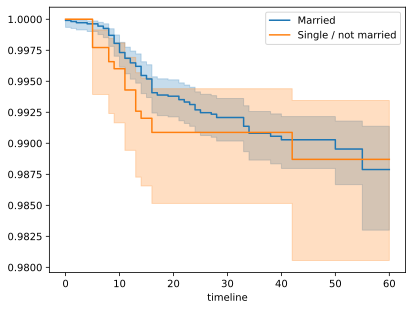

In [42]:
kmf = KaplanMeierFitter()
t = np.linspace(0, 60, 61)
kmf.fit(dt[dt['NAME_FAMILY_STATUS'] == 'Married']['month_on_book'], event_observed=dt[dt['NAME_FAMILY_STATUS'] == 'Married']['truncate'], timeline=t, label="Married")
ax = kmf.plot()

kmf.fit(dt[dt['NAME_FAMILY_STATUS'] == 'Single / not married']['month_on_book'], event_observed=dt[dt['NAME_FAMILY_STATUS'] == 'Single / not married']['truncate'], timeline=t, label="Single / not married")
ax = kmf.plot()